In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [16]:
image = cv2.imread("image5.jpg")
print(image.shape)
# find green ball in image
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)


(480, 640, 3)


x:  318.77593994140625 y:  287.4365234375
center:  (319, 287)
radius:  81.7909927368164


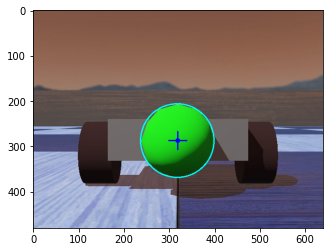

In [17]:
# find contours in the mask and initialize the current
# (x, y) center of the ball
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None
# only proceed if at least one contour was found
if len(cnts) > 0:
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
    # only proceed if the radius meets a minimum size
    if radius > 10:
        # draw the circle and centroid on the frame,
        # then update the list of tracked points
        cv2.circle(image, (int(x), int(y)), int(radius),
            (0, 255, 255), 2)
        cv2.circle(image, center, 5, (0, 0, 255), -1)
        print("x: ", x, "y: ", y)
        print("center: ", center)
        print("radius: ", radius)

# show the center of the ball on the image with a red cross
cv2.line(image, (center[0] - 20, center[1]), (center[0] + 20, center[1]), (0, 0, 255), 2)
cv2.line(image, (center[0], center[1] - 20), (center[0], center[1] + 20), (0, 0, 255), 2)
# show the image
plt.imshow(image)


In [ ]:

# x = 319 y = 287
# radius = 80

 